# Illustration
https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN

# 2. Create Synthetic Data

In [2]:
from sklearn.datasets import make_circles

Text(0.5, 1.0, 'Sebaran Data Pegawai')

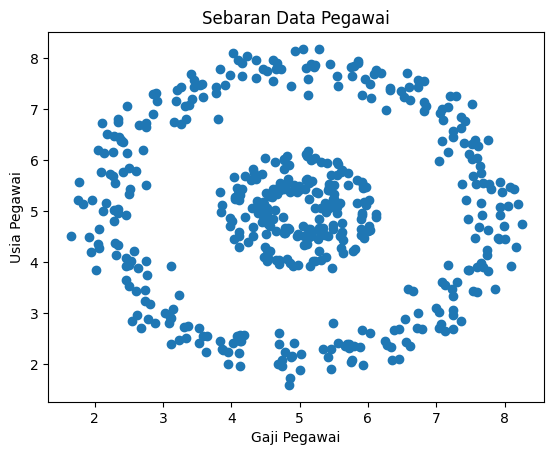

In [26]:
X1 = make_circles(300,noise=0.06,random_state=42,factor=0.9)[0]*3
X2 = make_circles(200,noise=0.10,random_state=42,factor=0.5)[0]*1

X  = np.concatenate((X1,X2),axis=0) + [5,5]

plt.scatter(X[:,0],X[:,1])
plt.xlabel('Gaji Pegawai')
plt.ylabel('Usia Pegawai')
plt.title('Sebaran Data Pegawai')

# 3. Clustering by DBSCAN

In [28]:
cluster_model = DBSCAN(eps=0.5, min_samples=5)
cluster_model.fit(X)

DBSCAN()

In [32]:
## Cluster Label
df_result = pd.DataFrame(X)
df_result.columns = ['Gaji Pegawai','Usia Pegawai']
df_result['cluster'] = cluster_model.labels_

df_result['cluster'].value_counts()

cluster
0    300
1    200
Name: count, dtype: int64

<Axes: xlabel='Gaji Pegawai', ylabel='Usia Pegawai'>

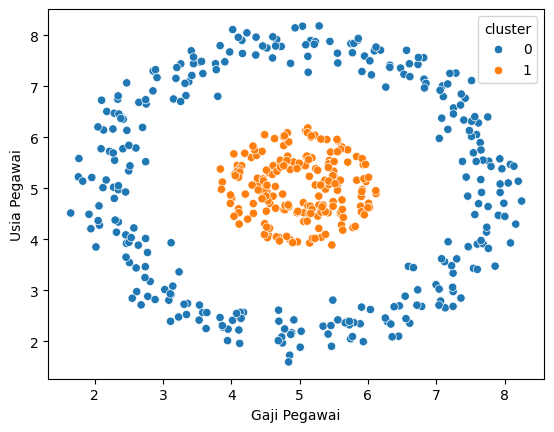

In [35]:
## Visualisasi
sns.scatterplot(data=df_result,x='Gaji Pegawai',y='Usia Pegawai',hue='cluster')

# 4. Analisa Jumlah Cluster
Untuk DBSCAN, hanya bisa cek Silhouette Score.

In [36]:
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'Silhouette Score')

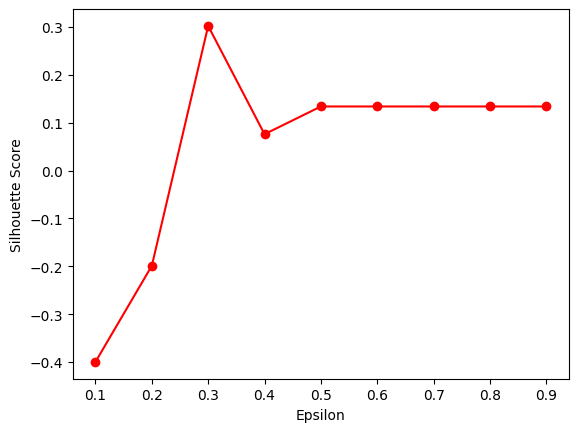

In [41]:
list_silhouette_score = []
list_epsilon          = []

for eps in np.arange(0.1,1,0.1):
    cluster_model = DBSCAN(eps=eps)
    cluster_model.fit(X)

    labels = cluster_model.labels_
    sil_score = silhouette_score(X,labels)

    list_silhouette_score.append(sil_score)
    list_epsilon.append(eps)

plt.plot(list_epsilon,list_silhouette_score,'r-o')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')

# 5. Final Cluster

In [56]:
cluster_model = DBSCAN(eps=0.2, min_samples=5)
cluster_model.fit(X)

DBSCAN(eps=0.2)

In [57]:
## Cluster Label
df_result = pd.DataFrame(X)
df_result.columns = ['Gaji Pegawai','Usia Pegawai']
df_result['cluster'] = cluster_model.labels_

df_result['cluster'].value_counts()

cluster
-1     214
 16    126
 18     15
 15     14
 9      11
 2       9
 1       8
 19      8
 8       8
 4       8
 0       8
 17      7
 21      7
 10      7
 3       7
 12      6
 7       6
 13      6
 14      5
 11      5
 6       5
 5       5
 20      5
Name: count, dtype: int64

<Axes: xlabel='Gaji Pegawai', ylabel='Usia Pegawai'>

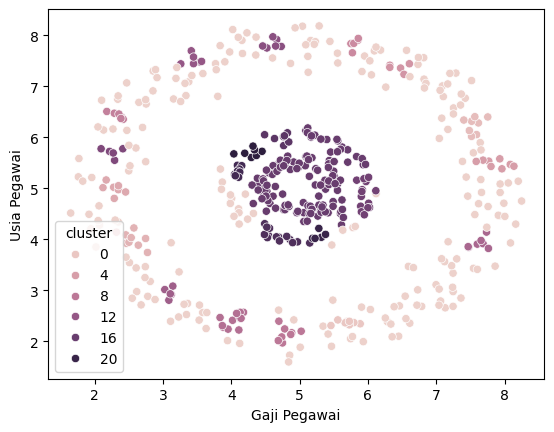

In [58]:
## Visualisasi
sns.scatterplot(data=df_result,x='Gaji Pegawai',y='Usia Pegawai',hue='cluster')